# GeoNet FDSN webservice with Obspy demo - Event Service

This demo introduces some simple code that requests data using [GeoNet's FDSN webservices](http://www.geonet.org.nz/data/tools/FDSN) and the [obspy module](https://github.com/obspy/obspy/wiki) in python. This notebook uses Python 3.

### Getting Started - Import Modules

In [1]:
from obspy import UTCDateTime
from obspy.clients.fdsn import Client as FDSN_Client
from obspy import read_inventory

### Define GeoNet FDSN client

In [2]:
client = FDSN_Client("GEONET")

## Accessing Earthquake Information
Use the **event** service to access earthquake parameters from the catalogue.

This example requests the Kaikoura earthquake and aftershocks for 24 hours following the event, within a 0.5 degree radius of the epicenter. It then prints a list and plots the locations on a map

10 Event(s) in Catalog:
2016-11-13T14:04:04.751658Z | -42.525, +173.298 | 5.131960364 M  | automatic
2016-11-13T11:08:18.373685Z | -42.616, +173.024 | 5.353569965 ML | manual
2016-11-13T12:37:43.824883Z | -42.432, +173.401 | 5.177874283 M  | manual
2016-11-13T11:30:25.823361Z | -42.529, +173.241 | 5.003968853 M  | manual
2016-11-13T11:16:10.635361Z | -42.758, +172.783 | 5.615649986 M  | manual
2016-11-13T12:25:55.502906Z | -42.705, +172.867 | 5.247682182 M  | manual
2016-11-13T11:09:06.935616Z | -42.612, +172.950 | 5.171948117 M  | manual
2016-11-13T11:02:56.346094Z | -42.693, +173.022 | 7.820379733 Mw(mB) | manual
2016-11-14T00:34:22.558475Z | -42.558, +173.324 | 6.261225536 M  | manual
2016-11-13T22:19:32.961377Z | -42.391, +173.214 | 5.402676232 M  | automatic


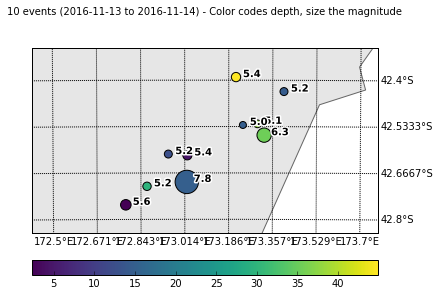

In [3]:
starttime = "2016-11-13 11:00:00.000"
endtime = "2016-11-14 11:00:00.000"
cat = client.get_events(starttime=starttime, endtime=endtime,latitude=-42.693,longitude=173.022,maxradius=0.5,minmagnitude=5)
print(cat)
_=cat.plot(projection="local")

Single events can be requested using their PublicID, which is available from the GeoNet website. This example will demonstrate how to get additional information about the [Kaikoura Earthquake](http://www.geonet.org.nz/earthquake/2016p858000).

In [4]:
cat = client.get_events(eventid="2016p858000")
print(cat)

1 Event(s) in Catalog:
2016-11-13T11:02:56.346094Z | -42.693, +173.022 | 7.36346279 MLv | manual


In [9]:
ev = cat[0]
print(ev)

Event:	2016-11-13T11:02:56.346094Z | -42.693, +173.022 | 7.36346279 MLv | manual

	            resource_id: ResourceIdentifier(id="smi:nz.org.geonet/2016p858000")
	             event_type: 'earthquake'
	          creation_info: CreationInfo(agency_id='WEL(GNS_Primary)', author='scevent@akeqp01.geonet.org.nz', creation_time=UTCDateTime(2016, 11, 13, 11, 3, 27, 886738))
	    preferred_origin_id: ResourceIdentifier(id="smi:nz.org.geonet/Origin#20161116052725.210418.52361")
	 preferred_magnitude_id: ResourceIdentifier(id="smi:nz.org.geonet/Magnitude#20161116052734.469407.55057")
	                   ---------
	                  picks: 189 Elements
	             amplitudes: 200 Elements
	                origins: 1 Elements
	             magnitudes: 5 Elements
	     station_magnitudes: 200 Elements


Print out a summary of the information for the preferred origin.

In [10]:
origin = ev.origins[0]
print(origin)

Origin
	        resource_id: ResourceIdentifier(id="smi:nz.org.geonet/Origin#20161116052725.210418.52361")
	               time: UTCDateTime(2016, 11, 13, 11, 2, 56, 346094) [confidence_level=89.99999762, uncertainty=0.3114605068]
	          longitude: 173.0221405 [confidence_level=89.99999762, uncertainty=3.42338418]
	           latitude: -42.6925354 [confidence_level=89.99999762, uncertainty=2.342521173]
	              depth: 15114.45332 [confidence_level=89.99999762, uncertainty=3593.426501]
	          method_id: ResourceIdentifier(id="smi:nz.org.geonet/LOCSAT")
	     earth_model_id: ResourceIdentifier(id="smi:nz.org.geonet/iasp91")
	            quality: OriginQuality(associated_phase_count=189, used_phase_count=94, associated_station_count=186, used_station_count=93, depth_phase_count=0, standard_error=1.822964596, azimuthal_gap=54.98503113, minimum_distance=0.2205573916, maximum_distance=7.640860558, median_distance=5.064006805)
	 origin_uncertainty: OriginUncertainty(horizontal_u

List all available magnitudes and their associated uncertainties

In [11]:
for m in range(len(ev.magnitudes)):
    if 'uncertainty' in ev.magnitudes[m].mag_errors and ev.magnitudes[m].mag_errors['uncertainty'] != None and ev.magnitudes[m].resource_id == ev.preferred_magnitude_id:
        print('%s = %f +/- %f - Preferred magnitude' % (ev.magnitudes[m].magnitude_type, ev.magnitudes[m].mag, ev.magnitudes[m].mag_errors['uncertainty']))
    elif 'uncertainty' in ev.magnitudes[m].mag_errors and ev.magnitudes[m].mag_errors['uncertainty'] != None:
        print('%s = %f +/- %f' % (ev.magnitudes[m].magnitude_type, ev.magnitudes[m].mag, ev.magnitudes[m].mag_errors['uncertainty']))
    else:
        print('%s = %f' % (ev.magnitudes[m].magnitude_type, ev.magnitudes[m].mag))

MLv = 7.363463 +/- 0.249774
ML = 7.763918 +/- 0.342303
mB = 7.692600 +/- 0.190699
Mw(mB) = 7.820380 +/- 0.400000 - Preferred magnitude
M = 7.762542


List all arrivals used to locate the earthquake.

In [12]:
print(origin.arrivals[0])
print(ev.picks[0])

Arrival
	   resource_id: ResourceIdentifier(id="smi:nz.org.geonet/Pick#20161113123811.075529.40667#Origin#20161116052725.210418.52361")
	       pick_id: ResourceIdentifier(id="smi:nz.org.geonet/Pick#20161113123811.075529.40667")
	         phase: 'P'
	       azimuth: 320.1345688
	      distance: 0.2203543117
	 time_residual: -0.890264
	   time_weight: 1.0
Pick
	     resource_id: ResourceIdentifier(id="smi:nz.org.geonet/Pick#20161113123811.075529.40667")
	            time: UTCDateTime(2016, 11, 13, 11, 3, 0, 419152)
	     waveform_id: WaveformStreamID(network_code='NZ', station_code='HSES', channel_code='BNN', location_code='20')
	      phase_hint: 'P'
	 evaluation_mode: 'manual'
	   creation_info: CreationInfo(agency_id='WEL(GNS_Primary)', author='salichon@akeqx01.geonet.org.nz', creation_time=UTCDateTime(2016, 11, 13, 12, 38, 11, 75905))


In [13]:
for p in range(len(ev.picks)):
    for a in range(len(origin.arrivals)):
        if ev.picks[p].resource_id == origin.arrivals[a].pick_id:
            if origin.arrivals[a].time_weight > 0:
                print(ev.picks[p].time, ev.picks[p].waveform_id['station_code'], origin.arrivals[a].distance, origin.arrivals[a].phase, origin.arrivals[a].time_residual)

2016-11-13T11:03:00.419152Z HSES 0.2203543117 P -0.890264
2016-11-13T11:03:03.661544Z CECS 0.2215131366 P 2.330498
2016-11-13T11:03:04.626728Z GVZ 0.274985135 P 2.411037
2016-11-13T11:03:05.188344Z WAKC 0.3566833863 P 1.525498
2016-11-13T11:03:06.155570Z KHZ 0.4705592521 P 0.417539
2016-11-13T11:03:09.408392Z AMCZ 0.5548961874 P 2.125621
2016-11-13T11:03:07.638393Z LTZ 0.5588204424 P 0.253331
2016-11-13T11:03:07.700013Z MOLS 0.6289876698 P -0.968559
2016-11-13T11:03:09.930874Z ASHS 0.6601385157 P 0.672006
2016-11-13T11:03:09.696868Z SJFS 0.716382775 P -0.649927
2016-11-13T11:03:11.693722Z KPOC 0.7323739701 P 1.077948
2016-11-13T11:03:12.660948Z SMHS 0.7599150871 P 1.509141
2016-11-13T11:03:12.052532Z OHSS 0.7971165011 P 0.215487
2016-11-13T11:03:12.801353Z NNBS 0.8330405857 P 0.314693
2016-11-13T11:03:12.785751Z MPSS 0.8531910465 P -0.046148
2016-11-13T11:03:13.004158Z DALS 0.8581281208 P 0.089051
2016-11-13T11:03:12.988558Z SACS 0.8664775651 P -0.070406
2016-11-13T11:03:13.563322Z STA